### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

**1. Read in the `coupons.csv` file.**




In [205]:
data = pd.read_csv('data/coupons.csv')

In [207]:
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


**2. Investigate the dataset for missing or problematic data.**

In [210]:
# Checks missing values
missing_values = data.isnull().sum()
missing_values

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [212]:
# Check data types
data.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [214]:
# Checks category count
print(data['Bar'].value_counts())


Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64


In [216]:
# Checks category count
print(data['CoffeeHouse'].value_counts())

CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64


In [218]:
# Checks category count
print(data['CarryAway'].value_counts())

CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64


In [220]:
# Checks category count
print(data['RestaurantLessThan20'].value_counts())

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64


In [222]:
# Checks category count
print(data['Restaurant20To50'].value_counts())

Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64


**3. Decide what to do about your missing data -- drop, replace, other...**

In [225]:
# Drop the car column because it has more then 12k missing values
data = data.drop(columns=['car'])

# Rename the column "passanger" to "passenger"
data.rename(columns={'passanger': 'passenger'}, inplace=True)

# Fill columns 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'
columns_to_fill = ['CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

# Fill missing values with the mode ('never')
for col in columns_to_fill:
    data[col] = data[col].fillna('never')

# Print
print(data[columns_to_fill].isnull().sum())

CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
dtype: int64


**4. What proportion of the total observations chose to accept the coupon?**



In [228]:
# Total
total_coupons = len(data)

# Calculate the proportion of accepted coupons
proportion_accept = data['Y'].mean() * 100

# Display the results
print(f"Total Coupons: {total_coupons}")
print(f"Proportion of Accepted Coupons: {proportion_accept:.2f}%")

Total Coupons: 12684
Proportion of Accepted Coupons: 56.84%


**5. Use a bar plot to visualize the `coupon` column.**

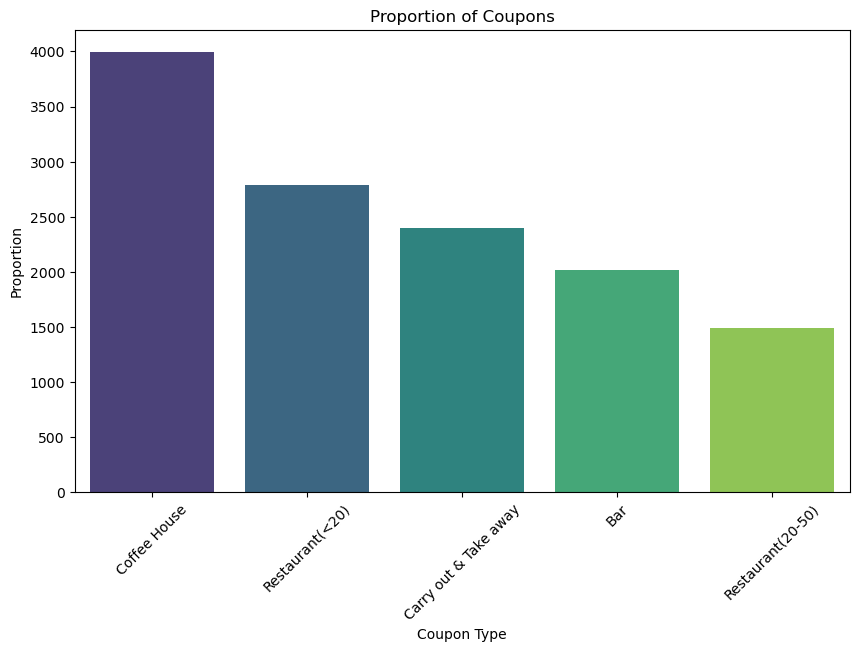

In [231]:
# Get Value counts for coupon column
coupon_proportions = data['coupon'].value_counts()

# Bar plot of totals and index from value counts
plt.figure(figsize=(10, 6))
sns.barplot(x=coupon_proportions.index, y=coupon_proportions.values, palette='viridis', hue=coupon_proportions.index)
plt.title('Proportion of Coupons')
plt.xlabel('Coupon Type')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()


In [233]:
# Accepted Coupon
accepted = data[data['Y'] == 1]

# Calculate value counts for the 'coupon' column
coupon_proportions_accepted = accepted['coupon'].value_counts()

# Display the result
print(coupon_proportions_accepted)

coupon
Coffee House             1995
Restaurant(<20)          1970
Carry out & Take away    1760
Bar                       827
Restaurant(20-50)         658
Name: count, dtype: int64


**6. Use a histogram to visualize the temperature column.**

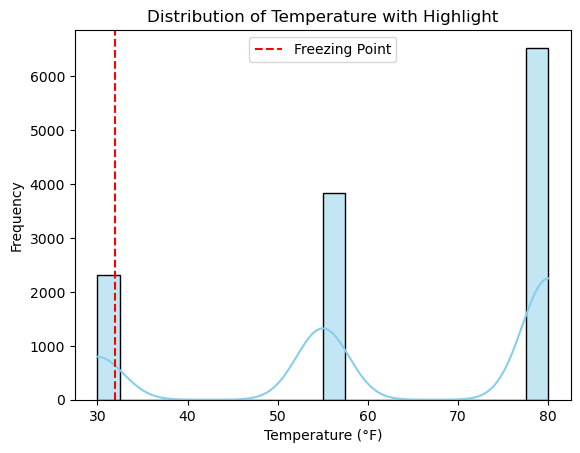

In [236]:
# Histogram of the temperature column
sns.histplot(data, x='temperature', bins=20, kde=True, color='skyblue', legend=True)
plt.axvline(x=32, color='red', linestyle='--', label='Freezing Point')
plt.title('Distribution of Temperature with Highlight')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

**1. Create a new `DataFrame` that contains just the bar coupons.**


In [238]:
# Filter for only coupons who equal to 'Bar' and create new data frame
bar_coupons = data[data['coupon'] == 'Bar']
bar_coupons

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [240]:
# Vefiy the bar totals 2017
data['coupon'].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

**2. What proportion of bar coupons were accepted?**


In [243]:
# Get total bar coupons
total_bar_coupons = len(bar_coupons)
# Get accepted bar coupons
accepted_bar_coupons = bar_coupons['Y'].sum()
# Calculate percentages
proportion_bar_accepted = (accepted_bar_coupons / total_bar_coupons) * 100

# Print values
print(f"Bar Coupons:")
print(f"  Total: {total_bar_coupons}")
print(f"  Accepted: {accepted_bar_coupons}")
print(f"  Proportion Accepted: {proportion_bar_accepted:.2f}%")

Bar Coupons:
  Total: 2017
  Accepted: 827
  Proportion Accepted: 41.00%


**3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.**


In [246]:
# Filter
or_fewer_accepted = bar_coupons[(bar_coupons['Bar'].isin(['less1', '1~3'])) & (bar_coupons['Y'] == 1)]
greater_than_3_accepted = bar_coupons[(bar_coupons['Bar'].isin(['4~8', 'gt8'])) & (bar_coupons['Y'] == 1)]

# Calculate percentages
or_fewer_percentage = (len(or_fewer_accepted) / len(bar_coupons)) * 100
greater_than_3_percentage = (len(greater_than_3_accepted) / len(bar_coupons)) * 100

# Print results
print(f"Accepted by '3 or fewer': {len(or_fewer_accepted)} ({or_fewer_percentage:.2f}%)")
print(f"Accepted by 'greater than 3': {len(greater_than_3_accepted)} ({greater_than_3_percentage:.2f}%)")

Accepted by '3 or fewer': 510 (25.29%)
Accepted by 'greater than 3': 153 (7.59%)


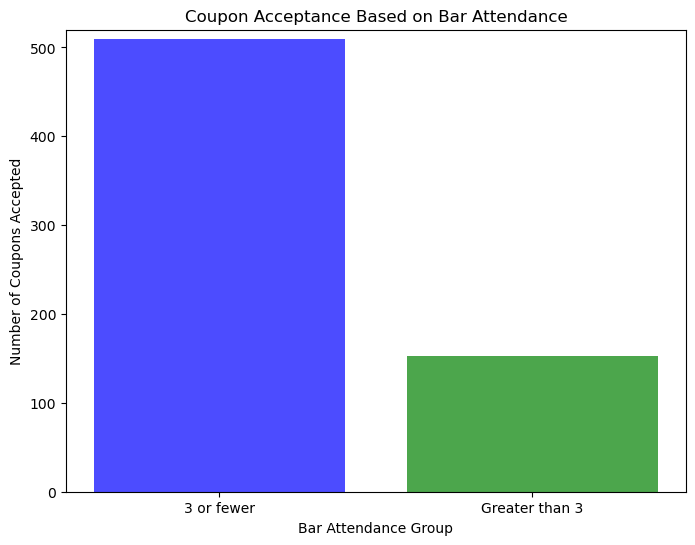

In [248]:
# Groups
groups = ['3 or fewer', 'Greater than 3']
# Counts
counts = [len(or_fewer_accepted), len(greater_than_3_accepted)]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(groups, counts, color=['blue', 'green'], alpha=0.7)
plt.title('Coupon Acceptance Based on Bar Attendance')
plt.xlabel('Bar Attendance Group')
plt.ylabel('Number of Coupons Accepted')
plt.ylim(0, max(counts) + 10)
plt.show()

**4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?**


In [250]:
# Bar frequency groups
frequent_bars = ['1~3', '4~8', 'gt8']
infrequent_bars = ['never', 'less1']
# Age groups
over_25_ages = ['26', '31', '36', '41', '46', '50plus']
under_25_ages = ['21', 'below21']

# Function to filter groups by bar frequency age and acceptance
def filter_group(data, bar_values, age_values):
    condition = (
        (data['Bar'].isin(bar_values)) &
        (data['age'].isin(age_values)) &
        (data['Y'] == 1)
    )
    return data[condition]

# Calls the filter function
frequent_over_25_accepted = filter_group(bar_coupons, frequent_bars, over_25_ages)
infrequent_under_25_accepted = filter_group(bar_coupons, infrequent_bars, under_25_ages)
frequent_under_25_accepted = filter_group(bar_coupons, frequent_bars, under_25_ages)
infrequent_over_25_accepted = filter_group(bar_coupons, infrequent_bars, over_25_ages)

# Totals
total_frequent_over_25 = len(frequent_over_25_accepted)
total_infrequent_under_25 = len(infrequent_under_25_accepted)
total_frequent_under_25 = len(frequent_under_25_accepted)
total_infrequent_over_25 = len(infrequent_over_25_accepted)

# Calculate percentages
rate_frequent_over_25 = (total_frequent_over_25 / total_bar_coupons) * 100
rate_infrequent_under_25 = (total_infrequent_under_25 / total_bar_coupons) * 100
rate_frequent_under_25 = (total_frequent_under_25 / total_bar_coupons) * 100
rate_infrequent_over_25 = (total_infrequent_over_25 / total_bar_coupons) * 100

# Print results with totals and percentages
print("Acceptance rate for frequent bar-goers over 25: {:.2f}% (Total: {})".format(rate_frequent_over_25, total_frequent_over_25))
print("Acceptance rate for infrequent bar-goers under 25: {:.2f}% (Total: {})".format(rate_infrequent_under_25, total_infrequent_under_25))
print("Acceptance rate for frequent bar-goers under 25: {:.2f}% (Total: {})".format(rate_frequent_under_25, total_frequent_under_25))
print("Acceptance rate for infrequent bar-goers over 25: {:.2f}% (Total: {})".format(rate_infrequent_over_25, total_infrequent_over_25))

Acceptance rate for frequent bar-goers over 25: 14.48% (Total: 292)
Acceptance rate for infrequent bar-goers under 25: 6.40% (Total: 129)
Acceptance rate for frequent bar-goers under 25: 5.85% (Total: 118)
Acceptance rate for infrequent bar-goers over 25: 13.88% (Total: 280)


In [252]:
# Value counts for the age column
bar_coupons['age'].value_counts()

age
21         417
26         395
31         339
50plus     283
36         209
41         178
46         109
below21     87
Name: count, dtype: int64

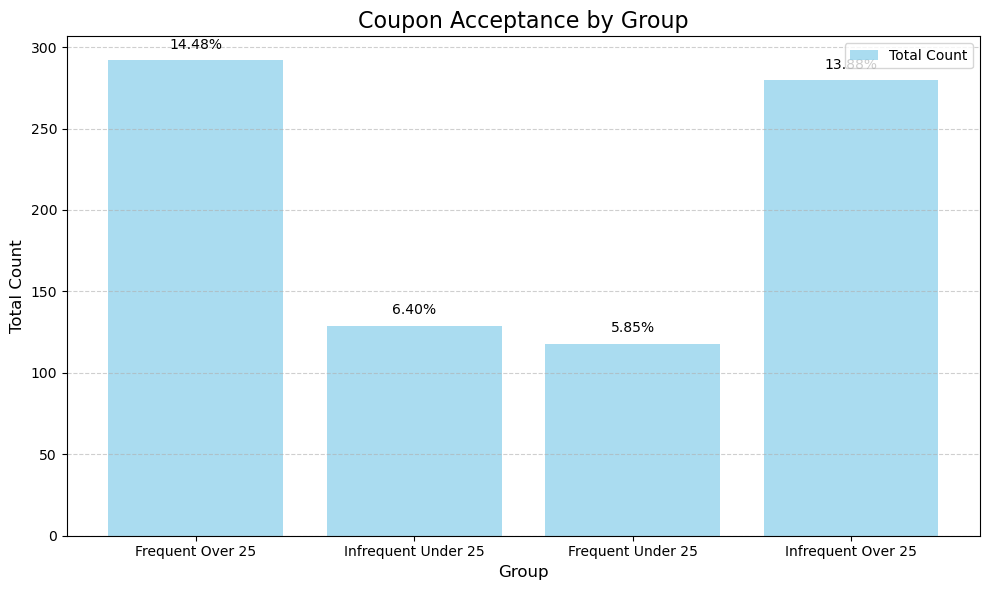

In [254]:
# Groups
groups = [
    "Frequent Over 25",
    "Infrequent Under 25",
    "Frequent Under 25",
    "Infrequent Over 25"
]

# Totals
totals = [len(frequent_over_25_accepted), len(infrequent_under_25_accepted), 
          len(frequent_under_25_accepted), len(infrequent_over_25_accepted)]

# Percentage
percentages = [
    (totals[0] / total_count) * 100,
    (totals[1] / total_count) * 100,
    (totals[2] / total_count) * 100,
    (totals[3] / total_count) * 100
]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(groups, totals, color='skyblue', alpha=0.7, label='Total Count')

# Loop the bars and create the plots
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5,
             f"{percentages[i]:.2f}%", ha='center', va='bottom', fontsize=10, color='black')

# Customize
plt.title("Coupon Acceptance by Group", fontsize=16)
plt.ylabel("Total Count", fontsize=12)
plt.xlabel("Group", fontsize=12)
plt.legend(["Total Count"], loc="upper right")
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

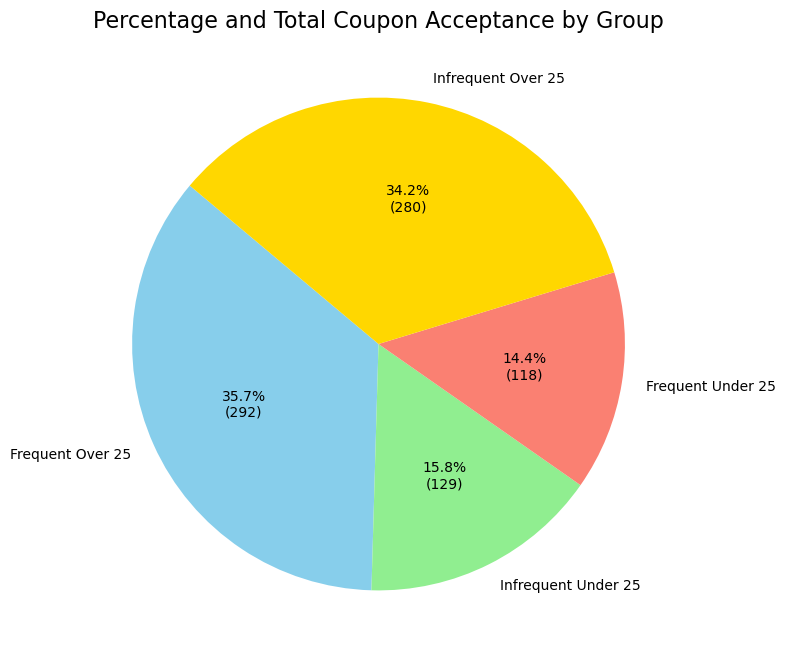

In [142]:
groups = [
    "Frequent Over 25",
    "Infrequent Under 25",
    "Frequent Under 25",
    "Infrequent Over 25"
]
totals = [len(frequent_over_25_accepted), len(infrequent_under_25_accepted), 
          len(frequent_under_25_accepted), len(infrequent_over_25_accepted)]
percentages = [(total / sum(totals)) * 100 for total in totals]

def format_autopct(pct, all_totals):
    absolute = int(round(pct / 100. * sum(all_totals)))
    return f"{pct:.1f}%\n({absolute})"

plt.figure(figsize=(8, 8))
plt.pie(
    percentages, 
    labels=groups, 
    autopct=lambda pct: format_autopct(pct, totals), 
    startangle=140, 
    colors=['skyblue', 'lightgreen', 'salmon', 'gold']
)
plt.title("Percentage and Total Coupon Acceptance by Group", fontsize=16)
plt.show()

**5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.**


In [257]:
# Groups
not_kids = ['Friend(s)', 'Partner']
excluded_occupations = ['farming', 'fishing', 'forestry']
frequent_bars = ['1~3', '4~8', 'gt8']

# Creates funtion that filters
def filter_group_two(data, bar_values, passengers, occupations):
    condition = (
        (data['Bar'].isin(bar_values)) &
        (data['Y'] == 1) &
        (data['passenger'].isin(passengers)) &
        (~data['occupation'].isin(occupations))
    )
    return data[condition]

# Results
results = filter_group_two(bar_coupons, frequent_bars, not_kids, excluded_occupations)

# Total
total_count = len(bar_coupons)
# Accepted Count
accepted_count = len(results)
# Acceptance Rate
acceptance_rate = (accepted_count / total_count) * 100

# Print
print(f"Total Bar Coupons: {total_count}")
print(f"Accepted Coupons: {accepted_count}")
print(f"Acceptance Rate: {acceptance_rate:.2f}%")


Total Bar Coupons: 2017
Accepted Coupons: 140
Acceptance Rate: 6.94%


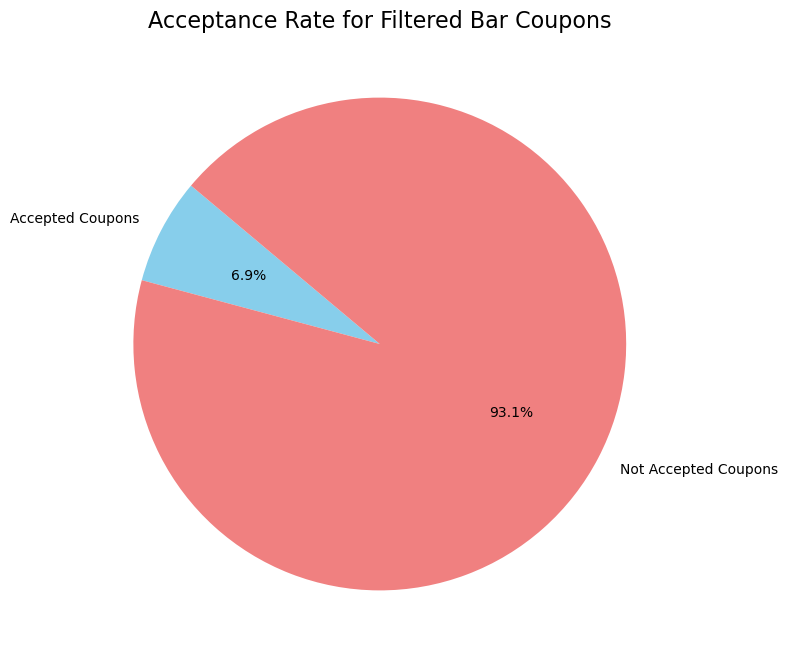

In [259]:
# Labels 
labels = ['Accepted Coupons', 'Not Accepted Coupons']
# Values
values = [accepted_count, total_count - accepted_count]

# Plot
plt.figure(figsize=(8, 8))
colors = ['skyblue', 'lightcoral']
plt.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
plt.title("Acceptance Rate for Filtered Bar Coupons", fontsize=16)
plt.show()

In [261]:
# Value counts on the passenger column
bar_coupons['passenger'].value_counts()

passenger
Alone        1200
Friend(s)     337
Partner       274
Kid(s)        206
Name: count, dtype: int64

In [265]:
# Value counts on the occution column
bar_coupons['occupation'].value_counts()

occupation
Unemployed                                   301
Student                                      251
Computer & Mathematical                      232
Sales & Related                              178
Education&Training&Library                   140
Management                                   119
Office & Administrative Support              105
Arts Design Entertainment Sports & Media     100
Business & Financial                          89
Retired                                       75
Food Preparation & Serving Related            48
Community & Social Services                   44
Healthcare Support                            44
Healthcare Practitioners & Technical          41
Transportation & Material Moving              35
Legal                                         34
Architecture & Engineering                    27
Personal Care & Service                       27
Protective Service                            27
Construction & Extraction                     24
Life Phys

**6. Compare the acceptance rates between those drivers who:**

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [268]:
# Define a function to filter data based on a given condition
def filter_group_three(data, condition):
    return data[condition]

# Define income categories considered as low income
low_income_categories = [
    "$25000 - $37499",
    "$12500 - $24999",
    "Less than $12500",
    "$37500 - $49999"
]

# Define conditions for Group 1:
group_1_condition = (
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons['passenger'].isin(['Friend(s)', 'Partner'])) &
    (bar_coupons['maritalStatus'] != 'Widowed') &
    (bar_coupons['Y'] == 1)
)

# Define conditions for Group 2:
group_2_condition = (
    (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (bar_coupons['age'].isin(['below21', '21', '26'])) &
    (bar_coupons['Y'] == 1)
)

# Define conditions for Group 3:
group_3_condition = (
    (bar_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
    (bar_coupons['income'].isin(low_income_categories)) &
    (bar_coupons['Y'] == 1)
)

# Filter the data for each group based on their conditions
group_1 = filter_group_three(bar_coupons, group_1_condition)
group_2 = filter_group_three(bar_coupons, group_2_condition)
group_3 = filter_group_three(bar_coupons, group_3_condition)

# Calculate the acceptance rate for each group as a percentage of the total data
group_1_rate = len(group_1) / len(bar_coupons) * 100
group_2_rate = len(group_2) / len(bar_coupons) * 100
group_3_rate = len(group_3) / len(bar_coupons) * 100

# Print the acceptance rates for each group with appropriate labels
print(f"Group 1 (Bar, Not Kid, Not Widowed) Acceptance Rate: {group_1_rate:.2f}%")
print(f"Group 2 (Bar, Under 30) Acceptance Rate: {group_2_rate:.2f}%")
print(f"Group 3 (Cheap Restaurants, Income < 50K) Acceptance Rate: {group_3_rate:.2f}%")


Group 1 (Bar, Not Kid, Not Widowed) Acceptance Rate: 6.94%
Group 2 (Bar, Under 30) Acceptance Rate: 12.35%
Group 3 (Cheap Restaurants, Income < 50K) Acceptance Rate: 7.73%


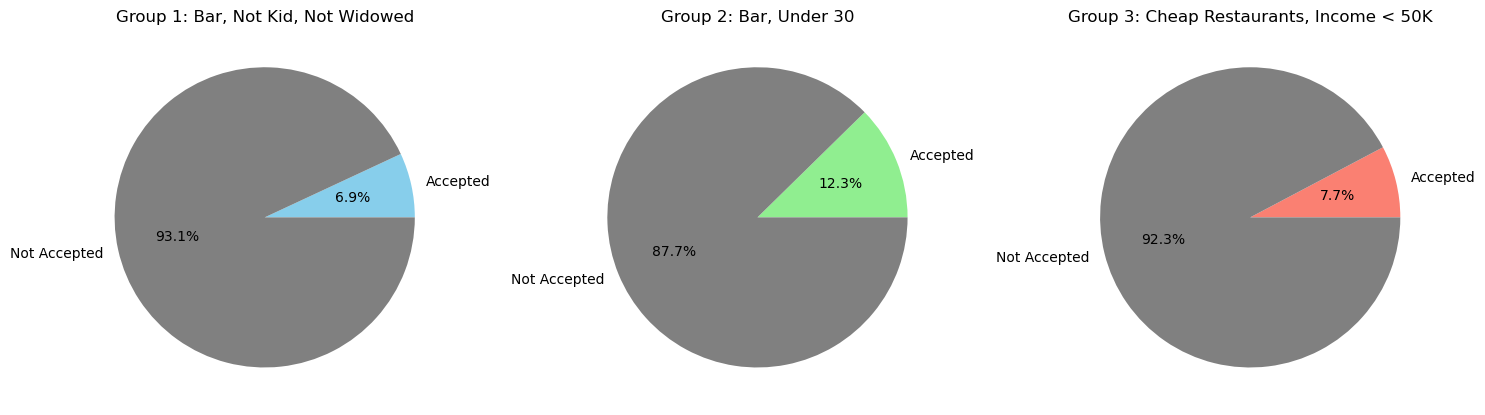

In [270]:
# Create a figure with 1 row and 3 columns of subplots, setting the figure size to 15x5 inches
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Define the data for the pie charts
groups = [len(group_1), len(group_2), len(group_3)]

# Titles for each pie chart corresponding to the group
titles = [
    "Group 1: Bar, Not Kid, Not Widowed", 
    "Group 2: Bar, Under 30", 
    "Group 3: Cheap Restaurants, Income < 50K"
]

# Define the color schemes for each pie chart
colors = [['skyblue', 'gray'], ['lightgreen', 'gray'], ['salmon', 'gray']]

# Loop through each subplot and draw a pie chart for the corresponding group
for i, ax in enumerate(axes):
    # Define the sizes for the pie chart: accepted count and not accepted count
    sizes = [groups[i], len(bar_coupons) - groups[i]]
    
    # Draw a pie chart on the current subplot
    ax.pie(
        sizes, 
        labels=['Accepted', 'Not Accepted'],  # Add labels to the chart segments
        autopct='%1.1f%%',  # Display percentages with one decimal place
        colors=colors[i]  # Use the specific color scheme for this group
    )
    
    # Set the title for the current subplot with font size 12
    ax.set_title(titles[i], fontsize=12)

# Adjust the layout to avoid overlapping of subplots
plt.tight_layout()

# Display the generated pie charts
plt.show()


In [272]:
# Value counts on the RestaurantLessThan20 column
bar_coupons['RestaurantLessThan20'].value_counts()

RestaurantLessThan20
1~3      878
4~8      568
less1    325
gt8      186
never     60
Name: count, dtype: int64

In [274]:
# Value counts on the income column
bar_coupons['income'].value_counts()

income
$25000 - $37499     318
$100000 or More     291
$12500 - $24999     288
$37500 - $49999     267
$50000 - $62499     262
Less than $12500    165
$75000 - $87499     151
$87500 - $99999     145
$62500 - $74999     130
Name: count, dtype: int64

**7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?**

Drivers who accepted bar coupons tend to be sociable, frequently visiting bars with adult companions like friends or partners. They are often middle-aged or older, financially stable, and engaged in urban lifestyles that align with bar activities. Additionally, cost-conscious drivers with incomes under $50K also show a higher likelihood of accepting coupons, valuing them as a way to offset expenses.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [279]:
# Value counts on the coupon column
data['coupon'].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

**Create a new `DataFrame` that contains just the Coffee House coupons.**

In [282]:
# Create coffee house coupons data frame
coffee_house_coupons = data[data['coupon'] == 'Coffee House']
coffee_house_coupons

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


**What proportion of coffee house coupons were accepted?**

In [285]:
# Calculate the total number of Coffee House coupons
total_coffee_coupons = len(coffee_house_coupons)

# Calculate the number of accepted Coffee House coupons (where Y == 1)
accepted_coffee_coupons = coffee_house_coupons['Y'].sum()

# Calculate the proportion of Coffee House coupons accepted as a percentage
proportion_accepted = coffee_house_coupons['Y'].mean() * 100

# Display the results with descriptive messages
print(f"Total Coffee House coupons: {total_coffee_coupons}")  # Total number of coupons
print(f"Accepted Coffee House coupons: {accepted_coffee_coupons}")  # Count of accepted coupons
print(f"Proportion of Coffee House coupons accepted: {proportion_accepted:.2f}%")  # Percentage of accepted coupons


Total Coffee House coupons: 3996
Accepted Coffee House coupons: 1995
Proportion of Coffee House coupons accepted: 49.92%


**Compare the acceptance rate between those who went to a coffee house 3 or fewer times a month to those who went more.**

In [288]:
# Filter
coffee_or_fewer_accepted = coffee_house_coupons[(coffee_house_coupons['CoffeeHouse'].isin(['less1', '1~3'])) & (coffee_house_coupons['Y'] == 1)]
coffee_greater_than_3_accepted = coffee_house_coupons[(coffee_house_coupons['CoffeeHouse'].isin(['4~8', 'gt8'])) & (coffee_house_coupons['Y'] == 1)]

# Calculate percentages
coffee_or_fewer_percentage = (len(coffee_or_fewer_accepted) / len(coffee_house_coupons)) * 100
coffee_greater_than_3_percentage = (len(coffee_greater_than_3_accepted) / len(coffee_house_coupons)) * 100

# Print results
print(f"Accepted by '3 or fewer': {len(coffee_or_fewer_accepted)} ({coffee_or_fewer_percentage:.2f}%)")
print(f"Accepted by 'greater than 3': {len(coffee_greater_than_3_accepted)} ({coffee_greater_than_3_percentage:.2f}%)")

Accepted by '3 or fewer': 1193 (29.85%)
Accepted by 'greater than 3': 594 (14.86%)


**Compare the acceptance rate between drivers who go to a coffee house more than once a month and are over the age of 25 to the all others. Is there a difference?**

In [291]:
# Define frequent and infrequent coffee house visits
frequent_coffee = ['1~3', '4~8', 'gt8']
infrequent_coffee = ['never', 'less1']
coffee_over_25_ages = ['26', '31', '36', '41', '46', '50plus']
coffee_under_25_ages = ['21', 'below21']

# filter method
def filter_coffee_group(data, coffee_values, age_values):
    condition = (
        (data['CoffeeHouse'].isin(coffee_values)) &  # Replace 'Bar' with 'CoffeeHouse'
        (data['age'].isin(age_values)) &
        (data['Y'] == 1)
    )
    return data[condition]

# Apply filters for each group
coffee_frequent_over_25_accepted = filter_coffee_group(coffee_house_coupons, frequent_coffee, coffee_over_25_ages)
coffee_infrequent_under_25_accepted = filter_coffee_group(coffee_house_coupons, infrequent_coffee, coffee_under_25_ages)
coffee_frequent_under_25_accepted = filter_coffee_group(coffee_house_coupons, frequent_coffee, coffee_under_25_ages)
coffee_infrequent_over_25_accepted = filter_coffee_group(coffee_house_coupons, infrequent_coffee, coffee_over_25_ages)

# Totals
coffee_total_frequent_over_25 = len(coffee_frequent_over_25_accepted)
coffee_total_infrequent_under_25 = len(coffee_infrequent_under_25_accepted)
coffee_total_frequent_under_25 = len(coffee_frequent_under_25_accepted)
coffee_total_infrequent_over_25 = len(coffee_infrequent_over_25_accepted)

# Calculate percentages
coffee_total_count = len(coffee_house_coupons)
coffee_rate_frequent_over_25 = (coffee_total_frequent_over_25 / coffee_total_count) * 100
coffee_rate_infrequent_under_25 = (coffee_total_infrequent_under_25 / coffee_total_count) * 100
coffee_rate_frequent_under_25 = (coffee_total_frequent_under_25 / coffee_total_count) * 100
coffee_rate_infrequent_over_25 = (coffee_total_infrequent_over_25 / coffee_total_count) * 100

# Print results with totals and percentages
print("Acceptance rate for frequent coffee-goers over 25: {:.2f}% (Total: {})".format(coffee_rate_frequent_over_25, coffee_total_frequent_over_25))
print("Acceptance rate for infrequent coffee-goers under 25: {:.2f}% (Total: {})".format(coffee_rate_infrequent_under_25, coffee_total_infrequent_under_25))
print("Acceptance rate for frequent coffee-goers under 25: {:.2f}% (Total: {})".format(coffee_rate_frequent_under_25, coffee_total_frequent_under_25))
print("Acceptance rate for infrequent coffee-goers over 25: {:.2f}% (Total: {})".format(coffee_rate_infrequent_over_25, coffee_total_infrequent_over_25))


Acceptance rate for frequent coffee-goers over 25: 21.70% (Total: 867)
Acceptance rate for infrequent coffee-goers under 25: 4.23% (Total: 169)
Acceptance rate for frequent coffee-goers under 25: 10.06% (Total: 402)
Acceptance rate for infrequent coffee-goers over 25: 13.94% (Total: 557)


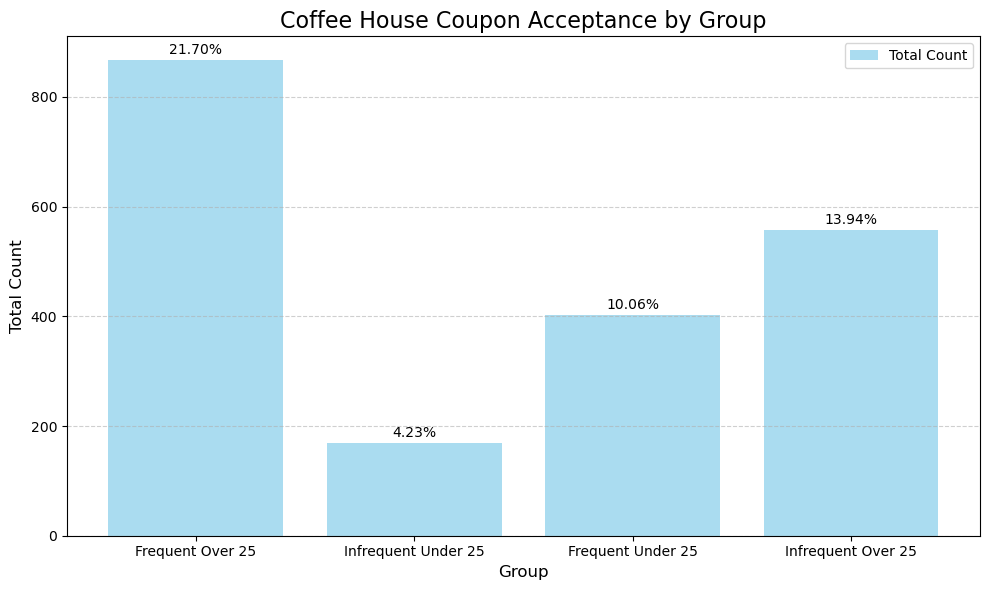

In [293]:
# Coffee groups
coffee_groups = [
    "Frequent Over 25",
    "Infrequent Under 25",
    "Frequent Under 25",
    "Infrequent Over 25"
]

# Coffee totals
coffee_totals = [
    len(coffee_frequent_over_25_accepted),
    len(coffee_infrequent_under_25_accepted),
    len(coffee_frequent_under_25_accepted),
    len(coffee_infrequent_over_25_accepted)
]

# Coffee percentages
coffee_percentages = [
    (coffee_totals[0] / coffee_total_count) * 100,
    (coffee_totals[1] / coffee_total_count) * 100,
    (coffee_totals[2] / coffee_total_count) * 100,
    (coffee_totals[3] / coffee_total_count) * 100
]

# Create a bar plot for Coffee House data
plt.figure(figsize=(10, 6))
bars = plt.bar(coffee_groups, coffee_totals, color='skyblue', alpha=0.7, label='Total Count')

# Add percentage labels on top of the bars
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5,
             f"{coffee_percentages[i]:.2f}%", ha='center', va='bottom', fontsize=10, color='black')

# Customize the plot
plt.title("Coffee House Coupon Acceptance by Group", fontsize=16)
plt.ylabel("Total Count", fontsize=12)
plt.xlabel("Group", fontsize=12)
plt.legend(["Total Count"], loc="upper right")
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

In [295]:
# Value counts for coffeeHouse
coffee_house_coupons['CoffeeHouse'].value_counts()

CoffeeHouse
less1    1075
1~3      1042
never     999
4~8       538
gt8       342
Name: count, dtype: int64

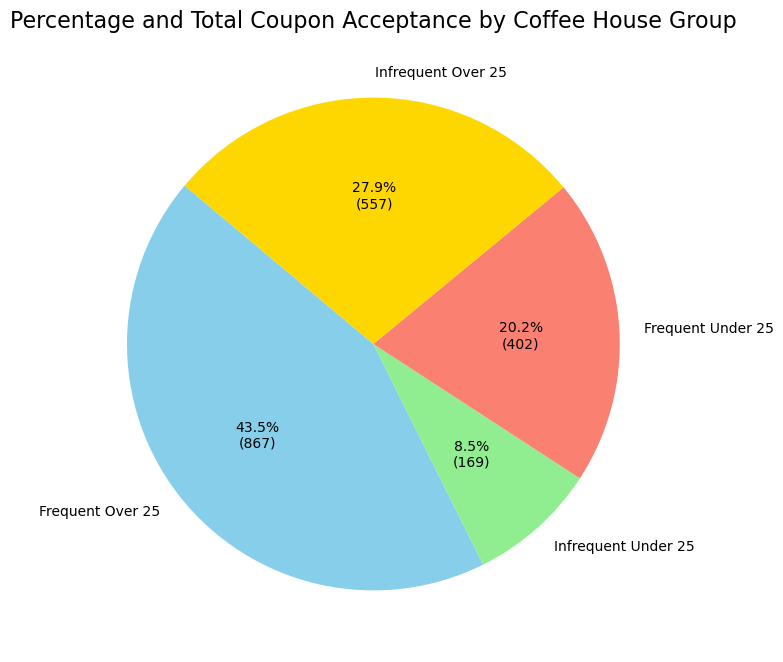

In [297]:
# Percent
coffee_percentages = [(total / sum(coffee_totals)) * 100 for total in coffee_totals]

# Function to format the labels with percentage and absolute values
def format_autopct(pct, all_totals):
    absolute = int(round(pct / 100. * sum(all_totals)))
    return f"{pct:.1f}%\n({absolute})"

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    coffee_percentages, 
    labels=coffee_groups, 
    autopct=lambda pct: format_autopct(pct, coffee_totals), 
    startangle=140, 
    colors=['skyblue', 'lightgreen', 'salmon', 'gold']
)
plt.title("Percentage and Total Coupon Acceptance by Coffee House Group", fontsize=16)
plt.show()

**Use the same process to compare the acceptance rate between drivers who go to coffee house more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.**

In [300]:
# Define the list of passengers who are not children
coffee_not_kids = ['Friend(s)', 'Partner']

# Define occupations to exclude from the analysis
coffee_excluded_occupations = ['farming', 'fishing', 'forestry']

# Define the list of frequent coffee visit values
frequent_coffee_visits = ['1~3', '4~8', 'gt8']

# Function to filter data for a specific group of coffee house users
def filter_coffee_group(data, coffee_values, passengers, occupations):
    # Define the filtering condition:
    condition = (
        (data['CoffeeHouse'].isin(coffee_values)) &  # Frequent visits to Coffee House
        (data['Y'] == 1) &  # Accepted the coupon
        (data['passenger'].isin(passengers)) &  # Allowed passenger types
        (~data['occupation'].isin(occupations))  # Exclude specified occupations
    )
    # Return the filtered data based on the condition
    return data[condition]

# Apply the filtering function to get the results for the Coffee House group
coffee_results = filter_coffee_group(coffee_house_coupons, frequent_coffee_visits, coffee_not_kids, coffee_excluded_occupations)

# Calculate the total number of Coffee House coupons
coffee_total_coupons = len(coffee_house_coupons)

# Calculate the number of accepted coupons based on the filtering condition
coffee_accepted_coupons = len(coffee_results)

# Calculate the acceptance rate as a percentage
coffee_acceptance_rate = (coffee_accepted_coupons / coffee_total_coupons) * 100

# Print the results with descriptive messages
print(f"Total Coffee House Coupons: {coffee_total_coupons}")  # Total number of coupons
print(f"Accepted Coffee House Coupons: {coffee_accepted_coupons}")  # Number of accepted coupons
print(f"Acceptance Rate: {coffee_acceptance_rate:.2f}%")  # Percentage of acceptance


Total Coffee House Coupons: 3996
Accepted Coffee House Coupons: 555
Acceptance Rate: 13.89%


Text(0.5, 1.0, 'Acceptance Rate for Filtered Coffee House Coupons')

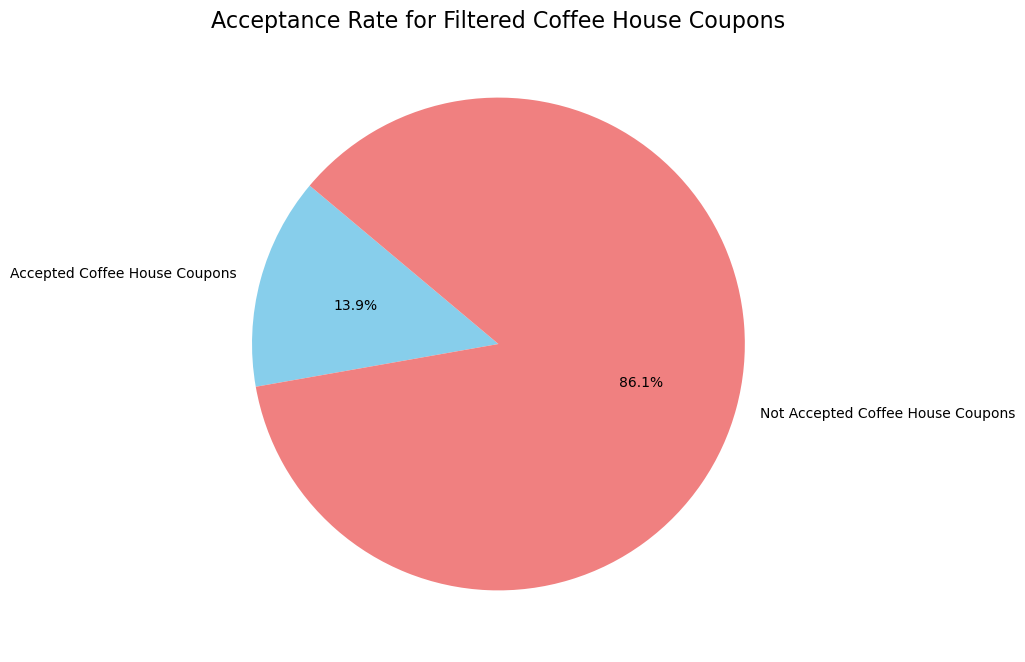

In [302]:
# Define labels for the pie chart segments
coffee_labels = ['Accepted Coffee House Coupons', 'Not Accepted Coffee House Coupons']

# Define values for the pie chart:
coffee_values = [coffee_accepted_coupons, coffee_total_coupons - coffee_accepted_coupons]

# Set the figure size for the pie chart
plt.figure(figsize=(8, 8))

# Define colors for the chart segments
coffee_colors = ['skyblue', 'lightcoral']

# Create the pie chart
plt.pie(
    coffee_values, 
    labels=coffee_labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=coffee_colors
)

# Add a title to the pie chart with font size 16
plt.title("Acceptance Rate for Filtered Coffee House Coupons", fontsize=16)



**Compare the acceptance rates between those drivers who:**
- go to coffee house more than once a month, had passengers that were not a kid, and were not widowed OR
- go to coffee house more than once a month and are under the age of 30 OR
- go to cheap restaurants more than 4 times a month and income is less than 50K.

In [305]:
# filter coffee method
def filter_coffee_conditions(data, condition):
    return data[condition]

# Categories
coffee_low_income_categories = [
    "$25000 - $37499",
    "$12500 - $24999",
    "Less than $12500",
    "$37500 - $49999"
]

# Group 1: Frequent coffee-goers, not kids as passengers, not widowed
coffee_condition_1 = (
    (coffee_house_coupons['CoffeeHouse'].isin(['1~3', '4~8', 'gt8'])) &
    (coffee_house_coupons['passenger'].isin(['Friend(s)', 'Partner'])) &
    (coffee_house_coupons['maritalStatus'] != 'Widowed') &
    (coffee_house_coupons['Y'] == 1)
)

# Group 2: Frequent coffee-goers and under 30
coffee_condition_2 = (
    (coffee_house_coupons['CoffeeHouse'].isin(['1~3', '4~8', 'gt8'])) &
    (coffee_house_coupons['age'].isin(['below21', '21', '26'])) &
    (coffee_house_coupons['Y'] == 1)
)

# Group 3: Cheap restaurant-goers and income < 50K
coffee_condition_3 = (
    (coffee_house_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
    (coffee_house_coupons['income'].isin(coffee_low_income_categories)) &
    (coffee_house_coupons['Y'] == 1)
)

# Apply filters
coffee_group_1 = filter_coffee_conditions(coffee_house_coupons, coffee_condition_1)
coffee_group_2 = filter_coffee_conditions(coffee_house_coupons, coffee_condition_2)
coffee_group_3 = filter_coffee_conditions(coffee_house_coupons, coffee_condition_3)

# Calculate acceptance rates
coffee_group_1_rate = len(coffee_group_1) / len(coffee_house_coupons) * 100
coffee_group_2_rate = len(coffee_group_2) / len(coffee_house_coupons) * 100
coffee_group_3_rate = len(coffee_group_3) / len(coffee_house_coupons) * 100

# Print results
print(f"Group 1 (Coffee, Not Kid, Not Widowed) Acceptance Rate: {coffee_group_1_rate:.2f}%")
print(f"Group 2 (Coffee, Under 30) Acceptance Rate: {coffee_group_2_rate:.2f}%")
print(f"Group 3 (Cheap Restaurants, Income < 50K) Acceptance Rate: {coffee_group_3_rate:.2f}%")


Group 1 (Coffee, Not Kid, Not Widowed) Acceptance Rate: 13.89%
Group 2 (Coffee, Under 30) Acceptance Rate: 16.99%
Group 3 (Cheap Restaurants, Income < 50K) Acceptance Rate: 9.96%


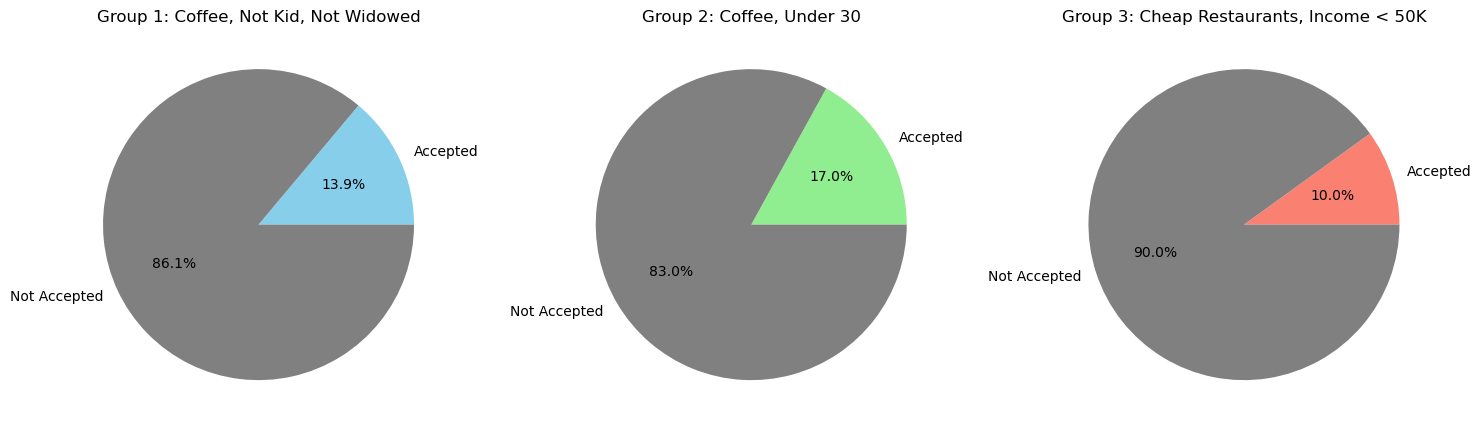

In [307]:
# Coffee groups
coffee_groups = [len(coffee_group_1), len(coffee_group_2), len(coffee_group_3)]

# Titles
coffee_titles = [
    "Group 1: Coffee, Not Kid, Not Widowed",
    "Group 2: Coffee, Under 30",
    "Group 3: Cheap Restaurants, Income < 50K"
]

# Coffee colors
coffee_colors = [['skyblue', 'gray'], ['lightgreen', 'gray'], ['salmon', 'gray']]

# Create subplots for pie charts
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop
for i, ax in enumerate(axes):
    sizes = [coffee_groups[i], len(coffee_house_coupons) - coffee_groups[i]]
    ax.pie(
        sizes,
        labels=['Accepted', 'Not Accepted'],
        autopct='%1.1f%%',
        colors=coffee_colors[i]
    )
    ax.set_title(coffee_titles[i], fontsize=12)

plt.tight_layout()
plt.show()


**Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?**

Drivers who accept Coffee House coupons are likely to be cost-conscious individuals, particularly infrequent visitors, older drivers (over 25), and those influenced by social factors like traveling with friends or partners. Financial considerations and lifestyle characteristics (e.g., income, passenger type, marital status) significantly influence acceptance rates.